# Battle of the Neighbourhoods

## South to North Bengaluru

### Introduction

#### Bengaluru city

Bengaluru is a large metropolitan city in South India. It is a major technology and start-up hub of the country and, as a result, has seen rapid growth and expansion over the past decade.

![](Bengaluru_map.png)

Bengaluru attracts several techies from across the country who are employed by global Tech giants like Microsoft, Google, Uber, etc. that have their Indian offices in the city and by start-ups that are causing waves in the domestic market. These companies are usually nested within large Tech Parks with sprawling campuses scattered all across the city. 

Apart from this, Bengaluru is also well known for its happening nightlife, thanks to the young working populace. The city is home to a large number of microbreweries and other eateries, catering to every palette, which attract large crowds even on weekdays.

On the downside, due to the sudden, uncontrolled expansion witnessed by the city, the traffic is a nightmare, especially at peak hours in the morning and evening. A lack of good intracity public transport system results in a lot of private vehicles on the road causing congestions. It is not uncommon for an average commuter to spend upwards of 3 hours on the road on bad days.

Working professionals tend to consider renting out flats that are in close proximity to their workplaces in neighbourhoods that have an affordable rental rates. Additionally, a neighbourhood that has easy access basic amenities, restaurants, entertainment centers is much sought after.

#### HSR Layout neighbourhood

HSR Layout is an area in south Bengaluru that is one such locality. It is connected to some of the largest Tech Parks in surrounding areas like Bellandur, Sarjapur, Electronic City apart from sprouting several start-ups. It is also a hub for food and shopping and is only a short distance away from Koramangala that is a popular pub hopping destination.

![](HSRLayout_map.png)

However, if a resident of HSR Layout lands a new job in Manyata Tech Park or World Trade Center which is in North Bengaluru, then they will have to rent out a new flat closer to their workplace to avoid long hours commuting. Hence, a neighbourhood needs to be identified for residing in, which is similar to HSR Layout but is in North Bengaluru.

This can also be extended to identify other neighbourhoods in Bengaluru that are similar to HSR Layout or to identify clusters of similar neighbourhoods. This would help those looking to move from one part of Bengaluru that they are familiar with to another, new one to shortlist localities to start their house hunting.

#### Problem

Grouping neighbourhoods of Bengaluru to help house hunters who have to move from one part of the city to another or small business owners who want to set up an outlet in a different part of the city, to identify potential neighbourhoods that suits their purpose with similar:
- Rental rates
- Access to amenities

With this information identify a neighbourhood in North Bengaluru that is similar to HSR Layout in South Bengaluru.

### Data

#### Data description

For the purpose of this project, the required data inputs and their sources are as given below:

| Data input required | Data source | Example |
| --- | --- | --- |
| Localities in Bengaluru | Makaan.com  Bengaluru rental rates page | HSR Layout, Malleshwaram, Kalyan Nagar |
| Rental rates of localities | Makaan.com Bengaluru rental rates page | Average rental rates for 2BHK in th localities |
| Coordinates of localities | Geocoder and Geopy | Latitude and longitudes of the localities |
| Popular spots in a locality | Foursquare API | Restaurants, entertainment centers, bars |

The details of the localities and the average property rental rates in Bengaluru to be considered will be fetched from this Makaan.com page: https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page=1

A sample page of data is presented below.

![](Bengaluru_localities_makaandotcom.png)

Of this, only the average rental rates of 2BHK will considered. Also, data from the first 10 pages of results will be considered as the data quality has been observed to drop after that.

#### Bengaluru neighbourhoods data collect and processing

Install the packages and libraries required for data processing

In [3]:
!pip install bs4
!pip install lxml

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml

     |████████████████████████████████| 112kB 8.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 5.8MB 15.8MB/s eta 0:00:01     |███████████▎                    | 2.0MB 15.8MB/s eta 0:00:01     |███████████████████████████████ | 5.6MB 15.8MB/s eta 0:00:01


Import data from the Makaan.com pages by scraping the site and stare the details of the neighbourhoods and the average rental rates of 2BHKs in the neighbourhoods in a dataframe.

In [2]:
Neighbourhood = []
Average_rent = []
    
for i in range(10):
    link = "https://www.makaan.com/price-trends/property-rates-for-rent-in-bangalore?page="+str(i+1)
    url = requests.get(link).text

    wiki = BeautifulSoup(url,'html')
    table = wiki.find('table',{'class':'tbl'})

    for row in table.findAll('tr'):
        cells=row.findAll('td')
        if len(cells)>0:
            Neighbourhood.append(cells[0].find(text=True))
            Average_rent.append(cells[4].find(text=True))

df = pd.DataFrame()
df['Neighbourhood'] = Neighbourhood
df['Average_rent'] = Average_rent

print(df.dtypes)
df

Neighbourhood    object
Average_rent     object
dtype: object


,Neighbourhood,Average_rent
0,HSR Layout,"26,750"
1,Koramangala,"32,327.27"
2,Jigani,"7,000"
3,Mahadevapura,"13,525"
4,Whitefield Hope Farm Junction,"13,500"
...,...,...
595,Electronic City Flyover,"15,250"
596,Ganga Nagar,"20,000"
597,Gantiganahalli,-
598,Hagadur,-


Clean data to remove records which have poor data quality and to have teh right data types assigned to the data

In [3]:
df.replace(',','', regex=True, inplace=True)                                 # Remove commas from the Average_rent column to convert it to float datatype
df.drop(df[df['Average_rent'] == '-'].index, inplace = True)                 # Drop rows where the Average_rent is '-'
df['Average_rent'] = pd.to_numeric(df['Average_rent'], downcast='integer')     # Convert datatype of Average_rent field to float
print(df.dtypes)
df

Neighbourhood     object
Average_rent     float64
dtype: object


,Neighbourhood,Average_rent
0,HSR Layout,26750.00
1,Koramangala,32327.27
2,Jigani,7000.00
3,Mahadevapura,13525.00
4,Whitefield Hope Farm Junction,13500.00
...,...,...
587,Whitefield Road,15000.00
589,Akshaya Nagar,16500.00
590,Basapura Main Road,14000.00
595,Electronic City Flyover,15250.00


In [81]:
df.to_csv('Bengaluru_neighbourhoods.csv', index=False)  # Write dataframe to csv for reference

It is observed that several neighbourhoods are repeated in the data with different spellings. Such cases have been fixed by merging to form one record with the average rental rate of the records assigned to it.

The updated data is read from the csv file.

In [4]:
df = pd.read_csv('Bengaluru_neighbourhoods_cleaned.csv')

print(df.shape)
df

(352, 2)


,Neighbourhood,Average_rent
0,Abbigere,10500.00
1,Adugodi,19666.67
2,AECS Layout,25000.00
3,AK Colony,24000.00
4,Akshaya Nagar,16500.00
...,...,...
347,Yelachenahalli,17000.00
348,Yelahanka,10000.00
349,Yelahanka New Town,15666.67
350,Yemalur,18260.87


### Methodology

#### Preliminary data analysis

In [6]:
df.describe()

,Average_rent
count,352.000000
mean,18151.214148
std,7830.517871
min,1938.890000
25%,13568.747500
50%,17000.000000
75%,21000.000000
max,65000.000000


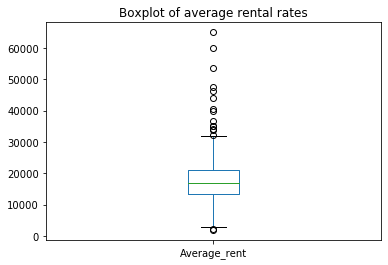

In [8]:
df.plot.box(title='Boxplot of average rental rates in Bengaluru')

Details of the average rental rates of 352 neighbourhoods of Bengaluru have been successfully procured.

It can be observed from the initial analysis of the average rental rates in the neighbourhoods of Bengaluru that:
- the average rental rate across Bengaluru city is Rs. 18000 (approx)
- half the neighbourhoods have have an average rental rate between Rs. 13500-21000
- with an average rental rate of Rs. 26750, HSR layout is on the higher end (4th quartile) of the spectrum
- there are several neighbourhoods in Bengaluru that can be considered to be be outliers due to extremely high average rental rates

#### Visualization of Bengaluru neighbourhoods

Install and import the required packages and libraries for data visualization

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import math

Install geocoder and import Nominatin to be enable fetching geographical coordinates of neighbourhoods

In [2]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Setup Foursquare API with Client ID and Client Secret.

Add columns to store latitudes and longitudes of neighbourhoods with default value as NaN

In [17]:
Latitudes = []
Longitudes = []

for i in range(len(df['Neighbourhood'])):
    Latitudes.append("NaN")
    Longitudes.append("NaN")
    
df['Neighbourhood_latitude'] = Latitudes
df['Neighbourhood_longitude'] = Longitudes

Fetch coordinates of neighbourhoods using Geocoder and store the values in the Dataframe.

It is to be noted that not all neighbourhoods have results from Geocoder. Hence, such neighbourhoods are skipped while traversing the list. These rows have latitudes and longitudes as NaN post processing and are then dropped.

In [ ]:
address = 'Bengaluru'
j = 546567
agent = "Caps"+str(j)+"_pro"+str(j)+"_Bgl"+str(j)+"_"+str(j)
geolocator = Nominatim(user_agent=agent)

for i in range(len(df['Neighbourhood'])):
    if i%40 == 0:
        j = j+1
        agent = "Caps"+str(j)+"_pro"+str(j)+"_Bgl"+str(j)+"_"+str(j)
        geolocator = Nominatim(user_agent=agent)
    print(agent)
    Neighbourhood = str(df.loc[i,'Neighbourhood'])
    print(Neighbourhood+", "+address)
    location = geolocator.geocode(Neighbourhood+", "+address)
    try:
        print(location.latitude)
        print(location.longitude)
        df.at[i,'Neighbourhood_latitude'] = location.latitude
        df.at[i,'Neighbourhood_longitude'] = location.longitude
    except:
        pass
df.dropna(inplace=True)

In [41]:
df

,Neighbourhood,Average_rent,Neighbourhood_longitude,Neighbourhood_latitude
0,Abbigere,10500.00,77.528865,13.074274
1,Adugodi,19666.67,77.610416,12.942847
2,AECS Layout,25000.00,77.713037,12.964118
3,AK Colony,24000.00,77.585311,12.909336
4,Akshaya Nagar,16500.00,77.683127,13.019543
...,...,...,...,...
335,Yelachenahalli,17000.00,77.570085,12.897971
336,Yelahanka,10000.00,77.596345,13.100698
337,Yelahanka New Town,15666.67,77.581189,13.097804
338,Yemalur,18260.87,77.680550,12.945464


The neighbourhoods are then plotted on a map

In [19]:
# create map
agent = "BAN_explorer"

geolocator = Nominatim(user_agent=agent)
location = geolocator.geocode("Bengaluru")
latitude = location.latitude
longitude = location.longitude
map_Bengaluru = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(df['Neighbourhood_latitude'], df['Neighbourhood_longitude'], df['Neighbourhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.65).add_to(map_Bengaluru)
       
map_Bengaluru

#### Venues data collect and cleaning

The top 150 popular places with a 1.75km radius of the neighbourhood coordinates are then fetched using the Foursquare API and consolidated in the same dataframe. Columns are added for each venue category encountered and each column give the number of venues belonging to that particular category in the area of the neighbourhood.

In [47]:
for i in range(len(df.index)):
    latitude = df.iloc[i,3]
    longitude = df.iloc[i,2]

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude,
            longitude,
            1750, 
            150)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    for v in results:
        col = str(v['venue']['categories'][0]['name'])
        if col not in df.columns:
            df.at[i,col] = 1
        elif math.isnan(df.loc[i,col]) is True:
            df.at[i,col] = 1
        else:
            df.at[i,col] = df.loc[i,col]+1
df.fillna(0.0)

In [11]:
df

,Neighbourhood,Average_rent,Neighbourhood_longitude,Neighbourhood_latitude,Park,Coffee Shop,Grocery Store,Pharmacy,Movie Theater,Indian Restaurant,...,Mattress Store,Garden Center,Animal Shelter,Track Stadium,Capitol Building,Planetarium,Casino,History Museum,Airport Terminal,Other Nightlife
0,Abbigere,10500.00,77.528865,13.074274,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adugodi,19666.67,77.610416,12.942847,0,3,0,0,1,16,...,0,0,0,0,0,0,0,0,0,0
2,AECS Layout,25000.00,77.713037,12.964118,0,2,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
3,AK Colony,24000.00,77.585311,12.909336,0,6,0,1,1,21,...,0,0,0,0,0,0,0,0,0,0
4,Akshaya Nagar,16500.00,77.683127,13.019543,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Yelachenahalli,17000.00,77.570085,12.897971,0,1,0,0,1,7,...,0,0,0,0,0,0,0,0,0,0
336,Yelahanka,10000.00,77.596345,13.100698,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
337,Yelahanka New Town,15666.67,77.581189,13.097804,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
338,Yemalur,18260.87,77.680550,12.945464,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0


#### Data analysis with K-means clustering

Import necessary packages for carrying out analysis and visualizing the results

In [13]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K-means clustering is the chosen approach to group the neighbourhoods of Bengaluru.

As a first step, the optimal value of K to be used is determined using the elbow point method as detailed below.

In [8]:
inertias = [] 
mapping = {} 
K = range(1,10) 
Bengaluru_grouped_clustering = pd.DataFrame()
Bengaluru_grouped_clustering = df.drop(['Neighbourhood','Neighbourhood_latitude','Neighbourhood_longitude'], axis=1)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(Bengaluru_grouped_clustering) 
    kmeanModel.fit(Bengaluru_grouped_clustering)
    
    inertias.append(kmeanModel.inertia_) 

    mapping[k] = kmeanModel.inertia_

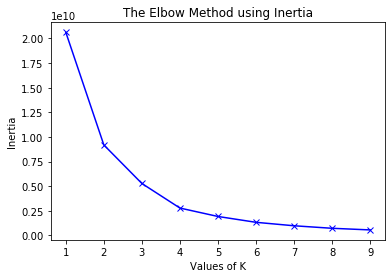

In [10]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

The value of K in the K-means clustering algorithm is chosen to be 6 as the curve shown above becomes linear from this point onwards

In [15]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bengaluru_grouped_clustering)

In [11]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 5, 5, 4, 4, 4, 4, 5, 0, 0, 4, 4, 2, 3, 3, 2, 0, 4, 2, 2, 4,
       0, 0, 2, 2, 2, 4, 0, 2, 4, 2, 4, 4, 2, 5, 1, 4, 4, 1, 4, 0, 2, 2,
       4, 4, 0, 1, 4, 2, 2, 2, 1, 4, 2, 5, 1, 4, 4, 0, 4, 2, 0, 0, 5, 0,
       4, 5, 2, 2, 4, 4, 0, 4, 2, 2, 4, 0, 4, 0, 2, 2, 0, 4, 0, 4, 4, 4,
       2, 1, 2, 2, 4, 4, 4, 5, 2, 2, 2, 2, 0, 5, 2, 4, 5, 0, 5, 4, 4, 4,
       2, 5, 4, 2, 4, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 5, 5, 5, 1, 1, 5, 4,
       4, 2, 0, 2, 2, 4, 0, 1, 3, 1, 5, 0, 0, 2, 2, 2, 2, 1, 5, 2, 2, 2,
       2, 4, 4, 4, 2, 5, 5, 4, 0, 2, 0, 5, 4, 4, 0, 4, 1, 5, 2, 2, 2, 2,
       4, 4, 2, 4, 0, 0, 0, 1, 4, 0, 0, 2, 1, 5, 1, 2, 2, 4, 4, 4, 4, 5,
       4, 4, 4, 0, 2, 0, 0, 4, 0, 0, 0, 2, 4, 4, 4, 5, 4, 0, 1, 1, 2, 0,
       0, 5, 2, 4, 0, 3, 2, 2, 2, 5, 2, 4, 4, 2, 4, 4, 5, 2, 4, 2, 5, 2,
       4, 4, 5, 0, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 0, 5, 2,
       2, 4, 2, 0, 1, 5, 5, 5, 1, 4, 4, 4, 3, 5, 5, 2, 5, 2, 2, 2, 5, 5,
       5, 1, 4, 4, 0, 2, 0, 0, 2, 4, 2, 0, 0, 4, 0,

The results of the K-means clustering algorithm is inducted into the dataframe. The Cluster labels calculated are added as a column with a value rainging between 0-5 for each neighbourhood.

In [16]:
# add clustering labels
df.insert(0, 'Cluster_labels', kmeans.labels_)

In [13]:
df

,Cluster_labels,Neighbourhood,Average_rent,Neighbourhood_longitude,Neighbourhood_latitude,Park,Coffee Shop,Grocery Store,Pharmacy,Movie Theater,...,Mattress Store,Garden Center,Animal Shelter,Track Stadium,Capitol Building,Planetarium,Casino,History Museum,Airport Terminal,Other Nightlife
0,0,Abbigere,10500.00,77.528865,13.074274,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Adugodi,19666.67,77.610416,12.942847,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,AECS Layout,25000.00,77.713037,12.964118,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,AK Colony,24000.00,77.585311,12.909336,0,6,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Akshaya Nagar,16500.00,77.683127,13.019543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,4,Yelachenahalli,17000.00,77.570085,12.897971,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
336,0,Yelahanka,10000.00,77.596345,13.100698,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,4,Yelahanka New Town,15666.67,77.581189,13.097804,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,2,Yemalur,18260.87,77.680550,12.945464,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,0


Average rental rates and average number of amenities available in a neighbourhood are given below:

In [33]:
df['Amenities_count'] = df[df.columns[5:len(df.columns)]].sum(axis=1)
df

,Cluster_labels,Neighbourhood,Average_rent,Neighbourhood_longitude,Neighbourhood_latitude,Park,Coffee Shop,Grocery Store,Pharmacy,Movie Theater,...,Garden Center,Animal Shelter,Track Stadium,Capitol Building,Planetarium,Casino,History Museum,Airport Terminal,Other Nightlife,Amenities_count
0,0,Abbigere,10500.00,77.528865,13.074274,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
1,2,Adugodi,19666.67,77.610416,12.942847,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,100
2,5,AECS Layout,25000.00,77.713037,12.964118,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,53
3,5,AK Colony,24000.00,77.585311,12.909336,0,6,0,1,1,...,0,0,0,0,0,0,0,0,0,100
4,4,Akshaya Nagar,16500.00,77.683127,13.019543,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,4,Yelachenahalli,17000.00,77.570085,12.897971,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,41
336,0,Yelahanka,10000.00,77.596345,13.100698,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
337,4,Yelahanka New Town,15666.67,77.581189,13.097804,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
338,2,Yemalur,18260.87,77.680550,12.945464,0,1,0,0,0,...,0,0,0,0,0,0,1,2,0,13


In [39]:
df[['Cluster_labels','Average_rent','Amenities_count']].groupby('Cluster_labels').mean()

,Average_rent,Amenities_count
Cluster_labels,,
0,9767.630769,15.369231
1,32628.382857,73.714286
2,19283.056061,44.434343
3,52727.611667,91.666667
4,15006.175514,27.710280
5,25002.187857,48.666667


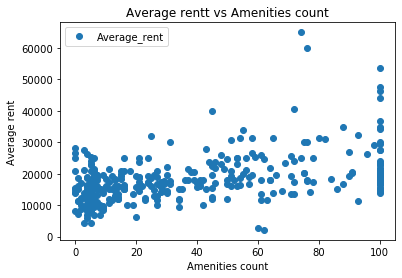

In [41]:
df.plot(x='Amenities_count', y='Average_rent', style='o')  
plt.title('Average rentt vs Amenities count')  
plt.xlabel('Amenities count')  
plt.ylabel('Average rent')  
plt.show()

In [43]:
X = df['Amenities_count'].values.reshape(-1,1)
y = df['Average_rent'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

NameError: name 'train_test_split' is not defined

### Results

The Bengaluru city has been divided into 6 clusters based on rental rates and amenities present in the neighbourhoods.

#### Visualization of clustered Bengaluru neighbourhoods

The neighbourhoods are plotted on a Map again, this time with the results of the clustering. The markers are encoded with colours indicating the cluster.

In [14]:
# create map
agent = "BAN_explorer"

geolocator = Nominatim(user_agent=agent)
location = geolocator.geocode("Bengaluru")
latitude = location.latitude
longitude = location.longitude
map_Bengaluru = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Neighbourhood_latitude'], df['Neighbourhood_longitude'], df['Neighbourhood'], df['Cluster_labels']):
    label = folium.Popup(str(poi) + ': Cluster ' + str(cluster), parse_html=True)
    colour = int(cluster-1)
    folium.CircleMarker(
        [lat, lon],
        radius=7.5,
        popup=label,
        color='#000000',
        fill=True,
        fill_color=rainbow[colour],
        fill_opacity=0.85,
        line_color='#000000',
        line_weight=0.5).add_to(map_Bengaluru)
       
map_Bengaluru

Based on the clustering and the visualization of the clusters, the neighbourhoods in North Bengaluru that is similar to HSR Layout in South Bengaluru are Sanjaynagar and RMV, both of which are located pretty close together and, hence, to simply the result, we finalize Sanjaynagar to be the location of choice.

Both HSR Layout and Sanjaynagar belong to Cluster 5.

In [40]:
df[['Cluster_labels','Neighbourhood','Average_rent','Amenities_count']].iloc[[127,280],:]

,Cluster_labels,Neighbourhood,Average_rent,Amenities_count
127,5,HSR Layout,26750.0,58
280,5,Sanjaynagar,25250.0,59


Plotting the two neighbourhoods along with their most popular venues in the same Map

In [ ]:
address = 'Bengaluru, India'

agent = "BANGY_explore_12323"

geolocator = Nominatim(user_agent=agent)
location = geolocator.geocode("HSR Layout, "+address)
latitude_HSR = location.latitude
longitude_HSR = location.longitude

location = geolocator.geocode("Sanjayanagar, "+address)
latitude_Sanjaynagar = location.latitude
longitude_Sanjaynagar = location.longitude

In [33]:
print('The geograpical coordinate of HSR Layout are {}, {}.'.format(latitude_HSR, longitude_HSR))
print('The geograpical coordinate of Sanjaynagar are {}, {}.'.format(latitude_Sanjaynagar, longitude_Sanjaynagar))

The geograpical coordinate of HSR Layout are 12.9121, 77.6446.
The geograpical coordinate of Sanjaynagar are 13.0345061, 77.5755194.


In [34]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude_HSR,
            longitude_HSR,
            1750, 
            150)
            
# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

venues_list = []
venues_list.append([(
            'HSR Layout', 
            latitude_HSR, 
            longitude_HSR, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude_Sanjaynagar,
            longitude_Sanjaynagar,
            1750, 
            150)
            
# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

venues_list.append([(
            'Sanjaynagar', 
            latitude_Sanjaynagar, 
            longitude_Sanjaynagar, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']     

nearby_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,HSR Layout,12.912100,77.644600,House of Commons,12.911994,77.638938,Pub
1,HSR Layout,12.912100,77.644600,Shree Sweets,12.914206,77.640986,Snack Place
2,HSR Layout,12.912100,77.644600,Corner House,12.909949,77.651883,Ice Cream Shop
3,HSR Layout,12.912100,77.644600,Northam's Pizza Pita,12.908749,77.646835,Pizza Place
4,HSR Layout,12.912100,77.644600,Juice Junction,12.915107,77.651729,Snack Place
...,...,...,...,...,...,...,...
117,Sanjaynagar,13.034506,77.575519,Burrito Boys,13.027452,77.573447,Mexican Restaurant
118,Sanjaynagar,13.034506,77.575519,Neel,13.027192,77.577144,Indian Restaurant
119,Sanjaynagar,13.034506,77.575519,Chicken County,13.037386,77.565964,Indian Restaurant
120,Sanjaynagar,13.034506,77.575519,Hotel Emirates,13.022453,77.584514,Indian Restaurant


In [35]:
print(nearby_venues['Venue Category'].unique())
df_nearby_venues = pd.DataFrame(nearby_venues.groupby(['Venue Category','Neighbourhood'])['Neighbourhood'].count())

['Pub' 'Snack Place' 'Ice Cream Shop' 'Pizza Place' 'Trail' 'Café'
 'Burger Joint' 'Kebab Restaurant' 'Department Store'
 'Middle Eastern Restaurant' 'Steakhouse' 'BBQ Joint' 'Punjabi Restaurant'
 'Chettinad Restaurant' 'Chinese Restaurant' 'Italian Restaurant'
 'American Restaurant' 'Maharashtrian Restaurant' 'Indian Restaurant'
 'Gym' 'North Indian Restaurant' 'Coffee Shop' 'Fish & Chips Shop'
 'Mediterranean Restaurant' 'Vegetarian / Vegan Restaurant' 'Bakery'
 'Fast Food Restaurant' 'Bike Shop' 'Business Service' 'Lake' 'Park' 'Bar'
 'Breakfast Spot' 'Motorcycle Shop' 'Sandwich Place'
 'Paper / Office Supplies Store' 'Asian Restaurant' 'Diner'
 'German Restaurant' 'Smoke Shop' 'Frozen Yogurt Shop' 'Restaurant'
 'Mexican Restaurant']


In [41]:
df_nearby_venues.rename(columns={'Neighbourhood': 'Count'},inplace=True)
df_nearby_venues

Count
Venue Category                Neighbourhood       
American Restaurant           HSR Layout         1
Asian Restaurant              Sanjaynagar        1
BBQ Joint                     HSR Layout         1
Bakery                        HSR Layout         1
Bar                           Sanjaynagar        1
Bike Shop                     HSR Layout         1
Breakfast Spot                Sanjaynagar        1
Burger Joint                  HSR Layout         1
                              Sanjaynagar        1
Business Service              HSR Layout         1
Café                          HSR Layout         7
                              Sanjaynagar        2
Chettinad Restaurant          HSR Layout         1
Chinese Restaurant            HSR Layout         2
                              Sanjaynagar        5
Coffee Shop                   HSR Layout         1
                              Sanjaynagar        1
Department Store              HSR Layout         4
                              Sanjaynagar        2
Diner                         Sanjaynagar        1
Fast Food Restaurant          HSR Layout         1
                              Sanjaynagar        6
Fish & Chips Shop             HSR Layout         1
Frozen Yogurt Shop            Sanjaynagar        1
German Restaurant             Sanjaynagar        1
Gym                           HSR Layout         2
                              Sanjaynagar        1
Ice Cream Shop                HSR Layout         5
                              Sanjaynagar        8
Indian Restaurant             HSR Layout         5
                              Sanjaynagar       15
Italian Restaurant            HSR Layout         3
                              Sanjaynagar        2
Kebab Restaurant              HSR Layout         1
Lake                          HSR Layout         1
Maharashtrian Restaurant      HSR Layout         1
Mediterranean Restaurant      HSR Layout         1
                              Sanjaynagar        1
Mexican Restaurant            Sanjaynagar        1
Middle Eastern Restaurant     HSR Layout         1
Motorcycle Shop               Sanjaynagar        1
North Indian Restaurant       HSR Layout         1
Paper / Office Supplies Store Sanjaynagar        1
Park                          HSR Layout         1
                              Sanjaynagar        1
Pizza Place                   HSR Layout         5
                              Sanjaynagar        4
Pub                           HSR Layout         1
Punjabi Restaurant            HSR Layout         2
Restaurant                    Sanjaynagar        1
Sandwich Place                Sanjaynagar        1
Smoke Shop                    Sanjaynagar        1
Snack Place                   HSR Layout         2
                              Sanjaynagar        1
Steakhouse                    HSR Layout         1
Trail                         HSR Layout         1
                              Sanjaynagar        1
Vegetarian / Vegan Restaurant HSR Layout         1
                              Sanjaynagar        1

In [38]:
# create map
map_venues_HSR_Sanjaynagar = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.CircleMarker(
        [latitude_HSR, longitude_HSR],
        radius=87.5,
        color='#000000',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.2).add_to(map_venues_HSR_Sanjaynagar)

folium.CircleMarker(
        [latitude_Sanjaynagar, longitude_Sanjaynagar],
        radius=87.5,
        color='#000000',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.2).add_to(map_venues_HSR_Sanjaynagar)

categories = len(df_nearby_venues.index.get_level_values(0).unique())

# set color scheme for the clusters
x = np.arange(categories)
ys = [i + x + (i*x)**2 for i in range(categories)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['Venue Latitude'], nearby_venues['Venue Longitude'], nearby_venues['Venue'], nearby_venues['Venue Category']):
    label = folium.Popup(str(poi) + ', ' + str(cluster), parse_html=True)
    colour = int(df_nearby_venues.index.get_level_values(0).unique().get_loc(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[colour-1],
        fill=True,
        fill_color=rainbow[colour-1],
        fill_opacity=0.85).add_to(map_venues_HSR_Sanjaynagar)
       
map_venues_HSR_Sanjaynagar

### Discussion

- There is a close relationship between the  amenities available in a neighbourhood and the average rental rates in the area - the more the amenities, the higher the rental rates of the neighnourhood
- Neighboourhoods that are cheaper but also have fewer amentities than the rest tend to be found outside the outer ring road of Bengaluru
- As one moves towards the interiors, the neighbourhoods become more desirable as is reflected in the increasing rental rates and amenities count
- The outliers found earlier which had extremely high average rental rates compared to the rest of the city are all grouped pretty close to each other in central Bengaluru
- Clusters 2 and 5 are similar in terms of amenities count and yet the former has an average rental rate that is 25% lesser - these are largely located in North East Bengaluru can be viewed as the developing areas of the city which are likely to yield high RoI in the future

### Conclusion

By clustering, similar neighbourhoods, in terms of rental rates and amenities, have been identified across Bengaluru. Along the way, the relationship between the rental rates, amenities and location of the neighbourhoods also emerged organically.

Using this, Sanjaynagar has been identified as the best location in North Bengaluru that closely resembles HSR Layout in South Bengaluru. A comparison of the two localities has also been presented.